In [1]:
CODIGO = 0
ALTO = 1
LARGO = 2
ANCHO = 3
X = 4
Y = 5
Z = 6
VOLUMEN = 7
ORIENTACION = 8

import math as mth
import pygame, sys
from pygame.locals import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


## Function Read DataSet

In [2]:
def DataSet(data_name):
    with open(data_name) as f:
        high, wide, extensive = [int(x) for x in next(f).split()]
        next(f)
        
        shapes = []
        data = []
        
        for line in f:
            data.append([x for x in line.split()])
            
        for i in range(len(data)):
            for q in range(int(data[i][0])):
                temp = []
                temp.append(data[i][1]+str(q+1))
                for j in range(2,len(data[i])):
                    temp.append(int(data[i][j]))
                temp.append(None)
                temp.append(None)
                temp.append(None)
                temp.append(int(data[i][2])*int(data[i][3])*int(data[i][4]))
                temp.append(1)

                shapes.append(temp)  
    
    return shapes, high, wide, extensive

## Function User Input Data

In [3]:
def UserInputData():
    
    high = int(input(" Ingrese alto del Contenedor"))
    wide = int(input(" Ingrese ancho del Contenedor"))
    long = int(input(" Ingrese largo del Contenedor"))

    N = int(input(" Ingrese cantidad de piezas en total :"))
    n , shapes = 1 , []


    # Imput valores
    while n <= N:
        cantidad = int(input(" Ingrese cantidad :"))
        code = input(" Ingrese codigo :")
        high_shape = int(input(" Ingrese alto de la pieza :"))
        long_shape = int(input(" Ingrese largo de la pieza :"))
        wide_shape = int(input(" Ingrese ancho de la pieza :"))
        print("  ")

        for i in range(cantidad):
            temp = [code+str(i+1),high_shape,long_shape,wide_shape,None,None,None,high_shape*long_shape*wide_shape,1]
            shapes.append(temp)
        n+= cantidad
        
   
    # TO DO : retornar high, wide, long
    return shapes, high, wide, long

## Function Parcial Volume

In [4]:
def parcial_Volume(nuevo, solutions):
    _, high, wide, extensive = DataSet("First_DataSet.txt")
    max = [0,0,0]

    for solution in solutions:
        if solution[X] + solution[LARGO] > max[0]:
            max[0] = solution[X] + solution[LARGO] 

        if solution[Y] + solution[ANCHO] > max[1]:
            max[1] = solution[Y] + solution[ANCHO] 

        if solution[Z] + solution[ALTO] > max[2]:
            max[2] = solution[Z] + solution[ALTO] 

    max[0] = nuevo[X] + nuevo[LARGO] if ( nuevo[X] + nuevo[LARGO] <= extensive and nuevo[Y] + nuevo[ANCHO] <= wide and nuevo[Z] + nuevo[ALTO] <= high) else mth.inf
    max[1] = nuevo[Y] + nuevo[ANCHO] if ( nuevo[X] + nuevo[LARGO] <= extensive and nuevo[Y] + nuevo[ANCHO] <= wide and nuevo[Z] + nuevo[ALTO] <= high) else mth.inf
    max[2] = nuevo[Z] + nuevo[ALTO] if ( nuevo[X] + nuevo[LARGO] <= extensive and nuevo[Y] + nuevo[ANCHO] <= wide and nuevo[Z] + nuevo[ALTO] <= high) else mth.inf

    temp = ( max[0] )*( max[1] )*( max[2] )

    nuevo[VOLUMEN] = temp if (temp <= high * wide * extensive) else mth.inf

## Function is Intersects

In [5]:
def is_Intersects(nuevo, solution):
    if(pygame.Rect(nuevo[X],nuevo[Y],nuevo[LARGO],nuevo[ANCHO]).colliderect(pygame.Rect(solution[X],solution[Y],solution[LARGO],solution[ANCHO])) 
    and ((nuevo[Z] >= solution[Z] and nuevo[Z] < solution[Z] + solution[ALTO] )  or (nuevo[Z] + nuevo[ALTO]) > solution[Z] and nuevo[Z] + nuevo[ALTO] <= solution[Z] + solution[ALTO]) ):
        return True

    return False

##  Funtion is Collision

In [6]:
def Copy(nuevo):
    temp = []
    for value in nuevo:
        temp.append(value)
    return temp

def is_Collision(nuevo, candidates, solutions):
    collision = False
    for _ in range(6):
        for solution in solutions:
            collision = True if (is_Intersects(nuevo, solution)) else False
            if collision:
                break

        if collision == False:
            parcial_Volume(nuevo, solutions)
            temp = Copy(nuevo)
            candidates.append(temp)
        change_Orientation(nuevo)
      

## Function Change Orientation

In [7]:
def change_Orientation(shape):
    
    if(shape[ORIENTACION] == 1):
        temp = shape[ALTO]
        shape[ALTO] = shape[LARGO]
        shape[LARGO] = temp
        shape[ORIENTACION] = 2
        
    elif(shape[ORIENTACION] == 2):
        temp = shape[ALTO]
        shape[ALTO] = shape[ANCHO]
        shape[ANCHO] = temp
        shape[ORIENTACION] = 3
        
    elif(shape[ORIENTACION] == 3):
        temp = shape[ALTO]
        shape[ALTO] = shape[LARGO]
        shape[LARGO] = temp
        shape[ORIENTACION] = 4
        
    elif(shape[ORIENTACION] == 4):
        temp = shape[ALTO]
        shape[ALTO] = shape[ANCHO]
        shape[ANCHO] = temp
        shape[ORIENTACION] = 5
        
    elif(shape[ORIENTACION] == 5):
        temp = shape[ALTO]
        shape[ALTO] = shape[LARGO]
        shape[LARGO] = temp
        shape[ORIENTACION] = 6
        
    elif(shape[ORIENTACION] == 6):
        temp = shape[ALTO]
        shape[ALTO] = shape[ANCHO]
        shape[ANCHO] = temp
        shape[ORIENTACION] = 1
  

## Function 3D  Graphics

In [8]:
def graphics(cube_definition, first, last):
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

    fig = plt.figure()


    faces = Poly3DCollection(edges, linewidths=1.5, edgecolors='k')

    if first == last-1:
        faces.set_facecolor((0.5,0.9,0.8,0.1))
    else:
        faces.set_facecolor((1,0.8,0.1,0.6))

    
    return faces, points


def Paint(solutions):
    cube_definitions = []
    for solution in solutions:
        if solution[VOLUMEN] != mth.inf :
            cube_definitions.append([(solution[X],solution[Y],solution[Z]), (solution[X]+solution[LARGO],solution[Y],solution[Z]),
                                     (solution[X],solution[Y]+solution[ANCHO],solution[Z]), (solution[X],solution[Y],solution[Z]+solution[ALTO])])

    cube_definitions.append([(0,0,0),(extensive,0,0),(0,wide,0),(0,0,high)])

    ax = plt.figure().add_subplot(111, projection='3d')

    for index in range(len(cube_definitions)):
        value , points = graphics(cube_definitions[index],index,len(cube_definitions))

        ax.add_collection3d(value)

        ax.scatter(points[:,0], points[:,1], points[:,1], s=0)



# Algorithm

In [11]:
def Algorithm(shapes):
    solutions = []
    shapes.sort(key=lambda shape: shape[VOLUMEN])

    for index in range(4,7):
        shapes[0][index] = 0

    solutions.append(shapes[0])

    for index in range(1,len(shapes)):
        candidates = []
        for solution in solutions:
            for status in range(3):
                if (status == 0):
                    shapes[index][X] = solution[X] + solution[LARGO]
                    shapes[index][Y] = solution[Y]
                    shapes[index][Z] = solution[Z]

                if (status == 1):
                    shapes[index][X] = solution[X] 
                    shapes[index][Y] = solution[Y] + solution[ANCHO]
                    shapes[index][Z] = solution[Z]

                if (status == 2):
                    shapes[index][X] = solution[X] 
                    shapes[index][Y] = solution[Y]
                    shapes[index][Z] = solution[Z] + solution[ALTO]

                is_Collision(shapes[index], candidates, solutions)

        if len(candidates) > 0:
            candidates.sort(key=lambda candidate: candidate[VOLUMEN])
            solutions.append(candidates[0])
            
    return solutions


## OutPut

In [20]:
def OutPut(solutions, TotalVolumen, UsadoVolumen):

    for solution in solutions:
        if solution[VOLUMEN] != mth.inf:
            UsadoVolumen += (solution[ALTO]*solution[ANCHO]*solution[LARGO])

    print(" Contenedores usados : 1")
    print (" Volumen del Contenedor : ",TotalVolumen,"m3")
    print (" Volumen Disponible : ",TotalVolumen-UsadoVolumen,"m3")
    print (" Volumen Ocupado : ",UsadoVolumen,"m3  -> ", "{0:.2f}".format((UsadoVolumen/TotalVolumen)*100),"%\n")

    print("Contenedor\t","Formato\t","Coordenadas\t","Orientacion")

    for solution in solutions:
        if solution[VOLUMEN] != mth.inf:
            print("     1\t\t   ",str(solution[CODIGO])+"\t\t   ",str(solution[X])+","+str(solution[Y])+","+str(solution[Z])+"\t    ",str(solution[ORIENTACION]))



## Call Function

 Contenedores usados : 1
 Volumen del Contenedor :  30 m3
 Volumen Disponible :  16 m3
 Volumen Ocupado :  14 m3  ->  46.67 %

Contenedor	 Formato	 Coordenadas	 Orientacion
     1		    A1		    0,0,0	     1
     1		    A2		    1,0,0	     4
     1		    C1		    0,0,1	     4


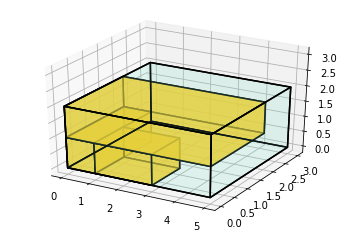

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [21]:
shapes, high, wide, extensive = DataSet("First_DataSet.txt")
#shapes, high, wide, extensive  = UserInputData()

TotalVolumen = high * wide *extensive
UsadoVolumen = 0

solutions = Algorithm(shapes)
OutPut(solutions, TotalVolumen, UsadoVolumen)
Paint(solutions)
